## Topic 4 - Outliers

#### Exercise 1

Create box plots on a single set of axes for all five experiments in the morley data set.

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe
import pandas as pd

# Statistics.
import scipy.stats as ss

In [2]:
# Read in the morley data.
data = np.genfromtxt('data/morley.csv', skip_header=1, delimiter=',', deletechars='"')

# Remove the first column.
data = data[:,1:]

In [3]:
# first experiment.
exper_1 = data[:20, 2]

exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

In [4]:
# Second experiment.
exper_2 = data[20:40, 2]

exper_2

array([960., 940., 960., 940., 880., 800., 850., 880., 900., 840., 830.,
       790., 810., 880., 880., 830., 800., 790., 760., 800.])

In [5]:
# A quick way to get the five experiments in different columns.
Fiveexperiments = data[:,2].reshape(5, 20).T
Fiveexperiments

array([[ 850.,  960.,  880.,  890.,  890.],
       [ 740.,  940.,  880.,  810.,  840.],
       [ 900.,  960.,  880.,  810.,  780.],
       [1070.,  940.,  860.,  820.,  810.],
       [ 930.,  880.,  720.,  800.,  760.],
       [ 850.,  800.,  720.,  770.,  810.],
       [ 950.,  850.,  620.,  760.,  790.],
       [ 980.,  880.,  860.,  740.,  810.],
       [ 980.,  900.,  970.,  750.,  820.],
       [ 880.,  840.,  950.,  760.,  850.],
       [1000.,  830.,  880.,  910.,  870.],
       [ 980.,  790.,  910.,  920.,  870.],
       [ 930.,  810.,  850.,  890.,  810.],
       [ 650.,  880.,  870.,  860.,  740.],
       [ 760.,  880.,  840.,  880.,  810.],
       [ 810.,  830.,  840.,  720.,  940.],
       [1000.,  800.,  850.,  840.,  950.],
       [1000.,  790.,  840.,  850.,  800.],
       [ 960.,  760.,  840.,  850.,  810.],
       [ 960.,  800.,  840.,  780.,  870.]])

In [6]:
# third experiment
exper_3 = Fiveexperiments[:20, 2]
exper_3

array([880., 880., 880., 860., 720., 720., 620., 860., 970., 950., 880.,
       910., 850., 870., 840., 840., 850., 840., 840., 840.])

In [7]:
# fourth experiment
exper_4 = Fiveexperiments[:20, 3]
exper_4

array([890., 810., 810., 820., 800., 770., 760., 740., 750., 760., 910.,
       920., 890., 860., 880., 720., 840., 850., 850., 780.])

In [8]:
# Fifth Experiment
exper_5 = Fiveexperiments[:20, 4]
exper_5

array([890., 840., 780., 810., 760., 810., 790., 810., 820., 850., 870.,
       870., 810., 740., 810., 940., 950., 800., 810., 870.])

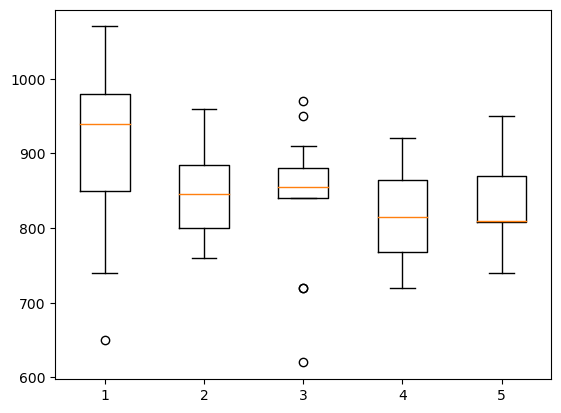

In [9]:
plt.boxplot(np.array([exper_1, exper_2, exper_3, exper_4, exper_5]).T);

##### Exercise 2

In [10]:
# Read in Fisher's Iris data set
from fileinput import filename
filename = 'Data\Iris.csv'
irisDS = pd.read_csv(filename, names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
irisDS

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


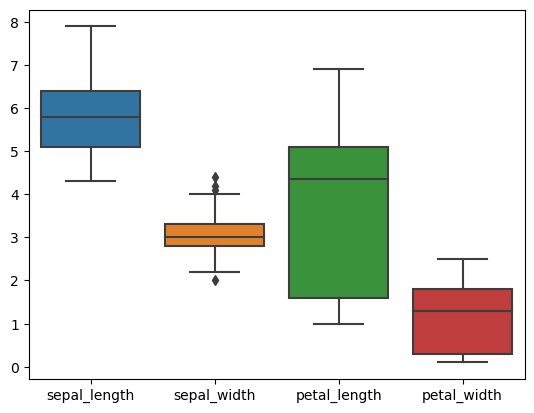

In [11]:
sns.boxplot(data=irisDS) # create box plot from dataframe
plt.show() # show plot

##### Exercise 3

Adapt the above code and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.

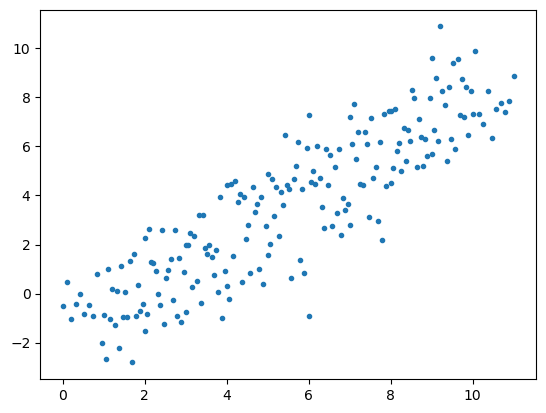

In [12]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])
# Create a corresponding series of y vectors.
ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))])

# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)
# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()
# Plot.
plt.plot(x, y, '.');

In [13]:
# Best fit line slope and y intercept.
m, c = np.polyfit(x, y, 1)

In [14]:
# Create a steadily increasing x range for plotting.
xbestfit = np.linspace(x.min(), x.max(), 1000)
# Create corresponding y values form best fit line.
ybestfit = m * xbestfit + c

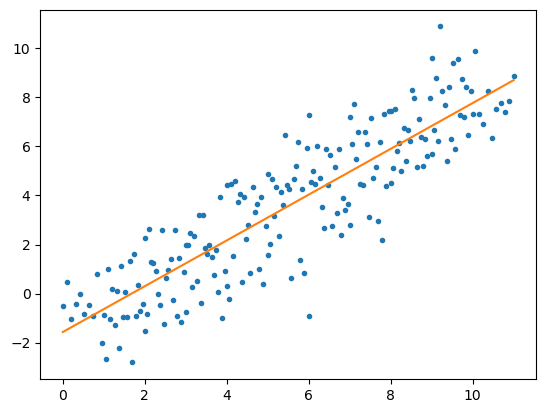

In [15]:
# Plot points.
plt.plot(x, y, '.')
# Plot line.
plt.plot(xbestfit, ybestfit);

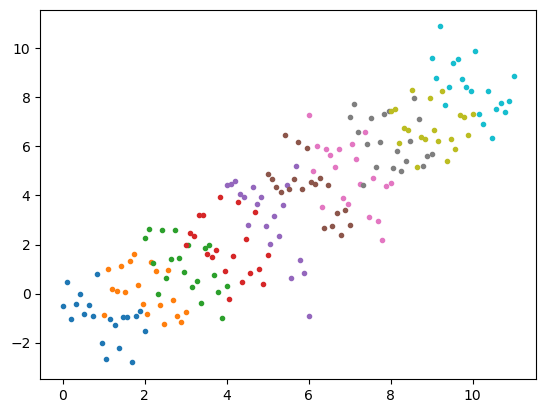

In [16]:
# Plot the same points, but now with a different colour for each range.
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], '.')

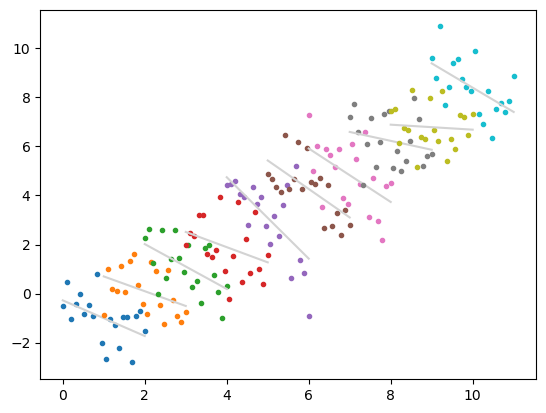

In [17]:
# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');

AttributeError: 'function' object has no attribute 'gca'

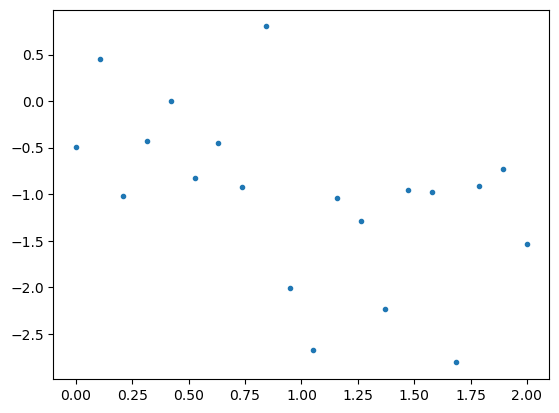

In [18]:
## https://stackoverflow.com/questions/2051744/how-to-invert-the-x-or-y-axis
# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot.gca(xbestfit, ybestfit, color='lightgrey');